<a href="https://colab.research.google.com/github/adityachoudharyclg/pytorchBasics/blob/master/Linear_regression_with_pytorch_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


In [0]:
X,Y=load_boston(return_X_y=True)
# print(X.shape,Y.shape)
# print(X,Y)

In [241]:
X=np.asarray(X,dtype=np.float64)
Y=np.reshape(Y,(Y.shape[0],1))
inputs=torch.from_numpy(X)
targets=torch.from_numpy(Y)
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
          6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
          4.9800e+00],
         [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
          7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
          9.1400e+00],
         [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 7.1850e+00,
          6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9283e+02,
          4.0300e+00]], dtype=torch.float64), tensor([[24.0000],
         [21.6000],
         [34.7000]], dtype=torch.float64))

In [0]:
train_dl=DataLoader(train_ds,batch_size=20,shuffle=True)

In [243]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[3.9610e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.0370e+00,
         3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9690e+02,
         8.0100e+00],
        [6.3931e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 5.8400e-01, 6.1620e+00,
         9.7400e+01, 2.2060e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.0276e+02,
         2.4100e+01],
        [2.8392e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 5.7080e+00,
         7.4300e+01, 4.7211e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9113e+02,
         1.1740e+01],
        [1.4390e-02, 6.0000e+01, 2.9300e+00, 0.0000e+00, 4.0100e-01, 6.6040e+00,
         1.8800e+01, 6.2196e+00, 1.0000e+00, 2.6500e+02, 1.5600e+01, 3.7670e+02,
         4.3800e+00],
        [1.0539e+00, 0.0000e+00, 8.1400e+00, 0.0000e+00, 5.3800e-01, 5.9350e+00,
         2.9300e+01, 4.4986e+00, 4.0000e+00, 3.0700e+02, 2.1000e+01, 3.8685e+02,
         6.5800e+00],
        [7.8860e-02, 8.0000e+01, 4.9500e+00, 0.0000e+00, 4.1100e-01, 7.1480e+00,

In [244]:
model=nn.Linear(inputs.shape[1],1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0947,  0.2237, -0.2436, -0.1791, -0.0159,  0.2544, -0.2319, -0.1598,
         -0.2771,  0.0162,  0.1304, -0.2391, -0.0865]], requires_grad=True)
Parameter containing:
tensor([0.2472], requires_grad=True)


In [245]:
preds=model(inputs.float())
preds.shape

torch.Size([506, 1])

In [0]:
loss_fn = F.mse_loss

In [247]:
loss = loss_fn(model(inputs.float()), targets.float())
print(loss)
loss.backward()

tensor(14308.3740, grad_fn=<MseLossBackward>)


In [0]:
opt = torch.optim.SGD(model.parameters(), lr=1e-8)

In [0]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    errors=[]
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb.float())
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb.float())
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        errors.append(loss.item())
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    plt.plot(errors)


Epoch [100/1000], Loss: 117.0611
Epoch [200/1000], Loss: 198.9012
Epoch [300/1000], Loss: 56.9209
Epoch [400/1000], Loss: 169.7771
Epoch [500/1000], Loss: 85.7689
Epoch [600/1000], Loss: 120.0085
Epoch [700/1000], Loss: 202.4949
Epoch [800/1000], Loss: 88.4459
Epoch [900/1000], Loss: 118.7280
Epoch [1000/1000], Loss: 39.2409


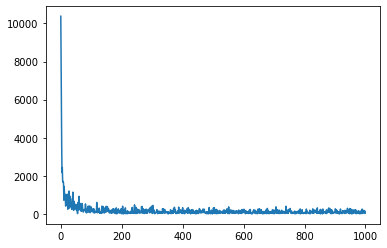

In [250]:
fit(1000, model, loss_fn, opt,train_dl)